In [1]:
import pandas as pd
import os
from functools import partial

In [2]:
def load_files(data_directory):
    dirs = [d for d in os.listdir(data_directory)
        if os.path.isdir(os.path.join(data_directory,d))]
    files  = []
    for d in dirs:
        label_dir = os.path.join(data_directory,d)
        files_names = [os.path.join(label_dir,f)
                        for f in os.listdir(label_dir)
                        if f.endswith(".xlsx") or f.endswith(".XLSX")]
        for k in files_names:
            if "xlsx"==k.split(".")[1]:
                files.append(["csv",k,pd.read_excel(k)])
    return files

def concatFiles(files):
    return pd.concat([files[i][2] for i in range(len(files))],axis=0)

In [3]:
main_path = "./data_directory/"
total_files = load_files(main_path)

In [4]:
#[f"id-{i}_PATH_: {total_files[i][1]}" for i in range(len(total_files))]

In [5]:
def genDictionary():
    col_index = ['Oferta','C. transfo.','Consumo_final']

    col_index_final = ['Sec. Consumo_propio','Sec. Industrial_y_minero',
                        'Sec. Transporte','Sec. Comercial_publ_residential']

    col_df = ['Energeticos_primarios','Derivados_Petroleos','Electricidad Gwh',
              'Derivados_Carbon','Gas_Corriente Mill m3','Metanol Mill ton','Total']
    struct_data = {}
    for i in range(len(col_index)):
        col_gen_id = col_index[i]
        struct_data[col_gen_id]={}
        if col_index[i]=='Consumo_final':
            for j in range(len(col_index_final)):
                struct_data[col_gen_id][col_index_final[j]]= {}
                for p in range(len(col_index_final)):
                    struct_data[col_gen_id][col_index_final[j]][f'col_{p}']={}
                    for k in range(len(col_df)):
                        struct_data[col_gen_id][col_index_final[j]][f'col_{p}'][col_df[k]]={}
        else:
            for j in range(len(col_df)):
                struct_data[col_gen_id][col_df[j]]={}
    return struct_data

def genDictionaryS():
    col_index = ['Oferta','C. transfo.','Consumo_final']

    col_index_final = ['Sec. Consumo_propio','Sec. Industrial_y_minero',
                        'Sec. Transporte','Sec. Comercial_publ_residential']

    col_df = ['Energeticos_primarios','Derivados_Petroleos','Electricidad Gwh',
              'Derivados_Carbon','Metanol Mill ton','Total']
    struct_data = {}
    for i in range(len(col_index)):
        col_gen_id = col_index[i]
        struct_data[col_gen_id]={}
        if col_index[i]=='Consumo_final':
            for j in range(len(col_index_final)):
                struct_data[col_gen_id][col_index_final[j]]= {}
                for p in range(len(col_index_final)):
                    struct_data[col_gen_id][col_index_final[j]][f'col_{p}']={}
                    for k in range(len(col_df)):
                        struct_data[col_gen_id][col_index_final[j]][f'col_{p}'][col_df[k]]={}
        else:
            for j in range(len(col_df)):
                struct_data[col_gen_id][col_df[j]]={}
    return struct_data

def load_excel(x,total_files,col_targets):
    xls = pd.ExcelFile(total_files[x][1])
    col = "Balance"
    dataframes={}
    if(x==2):
        dataframes[col] = xls.parse(col_targets[0],header=4)
    else:
        if(x==6):
            dataframes[col] = xls.parse(col_targets[2],header=4)
        else:
            dataframes[col] = xls.parse(str(col_targets[1]),header=4)
    xls.close()
    return dataframes[col].iloc[:,1:]

def transfoDataOferta(x,data,template,titles_offer):
    col_df = ['Energeticos_primarios','Derivados_Petroleos','Electricidad Gwh',
              'Derivados_Carbon','Gas_Corriente Mill m3','Metanol Mill ton','Total']
    col_unit = 'Oferta'
    map_index_col = [[0,9],[9,20],[20,21],[21,25],[25,26],[26,27],[27,28]]
    if(x==5):
        col_df = ['Energeticos_primarios','Derivados_Petroleos','Electricidad Gwh',
              'Derivados_Carbon','Metanol Mill ton','Total']
        map_index_col = [[1,10],[10,21],[21,22],[22,26],[26,27],[27,28]]
        titles_x = extractColTitles(data,True)
        template = genDictionaryS()
        for i in range(len(col_df)):
            data_temp = data[x].iloc[:8,map_index_col[i][0]:map_index_col[i][1]]
            data_temp.columns = titles_x[i]
            template[col_unit][col_df[i]] = data_temp
        return template

    else:
        for i in range(len(col_df)):
            data_temp = data[x].iloc[3:11,map_index_col[i][0]:map_index_col[i][1]]
            data_temp.columns = titles_offer[i]
            template[col_unit][col_df[i]] = data_temp
        return template


def transfoDataConsumptionTransfo(x,data,template,titles_offer):
    col_df = ['Energeticos_primarios','Derivados_Petroleos','Electricidad Gwh',
              'Derivados_Carbon','Gas_Corriente Mill m3','Metanol Mill ton','Total']
    col_unit = 'C. transfo.'
    map_index_col = [[0,9],[9,20],[20,21],[21,25],[25,26],[26,27],[27,28]]
    if(x==5):
        col_df = ['Energeticos_primarios','Derivados_Petroleos','Electricidad Gwh',
              'Derivados_Carbon','Metanol Mill ton','Total']
        map_index_col = [[1,10],[10,21],[21,22],[22,26],[26,27],[27,28]]
        titles_x = extractColTitles(data,True)
        template = genDictionaryS()
        for i in range(len(col_df)):
            data_temp = data[x].iloc[11:21,map_index_col[i][0]:map_index_col[i][1]]
            data_temp.columns = titles_x[i]
            template[col_unit][col_df[i]] = data_temp
        return template
    else:
        for i in range(len(col_df)):
            data_temp = data[x].iloc[11:21,map_index_col[i][0]:map_index_col[i][1]]
            data_temp.columns = titles_offer[i]
            template[col_unit][col_df[i]] = data_temp
        return template

def transfoDataConsumptionFinal(x,data,template,titles_offer):
    templ = template
    col_unit = 'Consumo_final'
    col_index_final = ['Sec. Consumo_propio','Sec. Industrial_y_minero',
                        'Sec. Transporte','Sec. Comercial_publ_residential']
    col_df = ['Energeticos_primarios','Derivados_Petroleos','Electricidad Gwh',
              'Derivados_Carbon','Gas_Corriente Mill m3','Metanol Mill ton','Total']
    
    if(x==5):
        col_df = ['Energeticos_primarios','Derivados_Petroleos','Electricidad Gwh',
              'Derivados_Carbon','Metanol Mill ton','Total']
        templ = genDictionaryS()
        indices_map = [[17,25],[25,37],[37,42],[42,47]]
        indices_map_cols = [[1,10],[10,21],[21,22],[22,26],[26,27],[27,28]]
        titles_x = extractColTitles(data,True)
        for index in range(len(col_index_final)):
            for j in range(len(indices_map)):
                for p in range(len(indices_map)):
                    for k in range(len(indices_map_cols)):
                        ### filtrado para cada uno
                        data_temp = data[x].iloc[indices_map[p][0]:indices_map[p][1],
                                                 indices_map_cols[k][0]:indices_map_cols[k][1]]
                        data_temp.columns = titles_offer[k]
                        templ[col_unit][col_index_final[index]][f'col_{p}'][col_df[k]] = data_temp
                        #print(f"({index},{j},{k})---{}")
        return templ
    else:
        indices_map = [[21,29],[29,41],[41,46],[46,51]]
        indices_map_cols = [[0,9],[9,20],[20,21],[21,25],[25,26],[26,27],[27,28]]
        for index in range(len(col_index_final)):
            for j in range(len(indices_map)):
                for p in range(len(indices_map)):
                    for k in range(len(indices_map_cols)):
                        ### filtrado para cada uno
                        data_temp = data[x].iloc[indices_map[p][0]:indices_map[p][1],
                                                 indices_map_cols[k][0]:indices_map_cols[k][1]]
                        data_temp.columns = titles_offer[k]
                        templ[col_unit][col_index_final[index]][f'col_{p}'][col_df[k]] = data_temp
                        #print(f"({index},{j},{k})---{}")
        return templ


In [6]:
#generar diccionario
base = genDictionary()

In [7]:
col_targets = ["Balance Energético (u.físicas) ","Balance Energético (u.físicas)","Balance energético (u.físicas)"]
result = []

for i in range(2,len(total_files)-5):
    #print(f'id_{i} -- - Dimension: {load_excel(i,total_files,col_targets).shape}\n')
    #print(load_excel(i,total_files,col_targets).head(1).values)
    result.append(load_excel(i,total_files,col_targets))

In [8]:
#[result[i].shape for i in range(len(result))]

In [9]:
#result[10].iloc[21:,:]

In [10]:
#result[6].iloc[21:29,:]

In [11]:
def extractColTitles(data,L):
    title_ofer_eprimary = data[0].iloc[2:3,0:9].values[0].tolist()[1:]
    title_ofer_eprimary = ["Item"]+title_ofer_eprimary
    title_ofer_der_petro = data[0].iloc[2:3,9:20].values[0].tolist()
    title_ofer_electricity = ['Electricidad (Gwh)']
    title_ofer_der_carbon = data[0].iloc[2:3,21:25].values[0].tolist()
    title_ofer_gas_corriente = data[0].iloc[1:2,25:26].values[0]
    title_ofer_metanol = data[0].iloc[1:2,26:27].values[0]
    title_ofer_total = ["Total"]
    if(not(L)):
        return [title_ofer_eprimary,title_ofer_der_petro,title_ofer_electricity,
                    title_ofer_der_carbon,title_ofer_gas_corriente,title_ofer_metanol,
                    title_ofer_total]
    else:
        return [title_ofer_eprimary,title_ofer_der_petro,title_ofer_electricity,
                title_ofer_der_carbon,title_ofer_metanol,title_ofer_total]

titles_list = extractColTitles(result,False)

In [17]:
anual = list(range(2010,2016))
anual

[2010, 2011, 2012, 2013, 2014, 2015]

In [64]:
%%time
data_offers = {}
data_ctransfo = {}
data_consumption = {}
for i in range(len(anual)):
    print(i)
    #data_offers[str(anual[i])] = transfoDataOferta(i,result,genDictionary(),titles_list)
    #data_ctransfo[str(anual[i])] = transfoDataConsumptionTransfo(i,result,genDictionary(),titles_list)
    data_consumption[str(anual[i])] = transfoDataConsumptionFinal(i,result,genDictionary(),titles_list)

0
1
2
3
4
5
Wall time: 360 ms


In [14]:
#genDictionary()

In [70]:
#['Sec. Consumo_propio','Sec. Industrial_y_minero',
#                        'Sec. Transporte','Sec. Comercial_publ_residential']

data_consumption['2015']['Consumo_final']['Sec. Consumo_propio']['col_2']['Derivados_Petroleos']['Gas Licuado (Mil ton)']

37    30.650443
38    30.621143
39            0
40       0.0269
41       0.0024
Name: Gas Licuado (Mil ton), dtype: object

In [74]:
data_consumption['2015']['Consumo_final']['Sec. Consumo_propio']['col_3']['Derivados_Petroleos'].keys()

Index(['Petróleo Diesel (Mil m3)', 'Petróleo Combustible (Mil ton)',
       'Gasolina de Motor (Mil m3)', 'Kerosene (Mil m3)',
       'Gas Licuado (Mil ton)', 'Gasolina de Aviación (Mil m3)',
       'Kerosene de Aviación (Mil m3)', 'Nafta (Mil m3)',
       'Gas de Refinería (Mil m3)', 'Coque de Petróleo (Mil ton)',
       'D.I. de Petróleo (Mil ton)'],
      dtype='object')

In [ ]:
data_consumption['2010']['Consumo_final']['Sec. Consumo_propio']['col_3']['Petróleo Diesel (Mil m3)']

In [ ]:
data_consumption['2010']['Consumo_final']['Sec. Consumo_propio']['col_3']['Petróleo Diesel (Mil m3)']

In [ ]:
data_consumption['2010']['Consumo_final']['Sec. Consumo_propio']['col_0']['Energeticos_primarios']

In [ ]:
data_consumption['2020']['Consumo_final']['Sec. Consumo_propio']['col_0']['Energeticos_primarios']

In [19]:
linea_temporal = []
for i in range(2010,2016):
    linea_temporal.append(str(i))

In [ ]:
#### extraccion sectores comerciales publicos 

In [ ]:
col_df = ['Energeticos_primarios','Derivados_Petroleos','Electricidad Gwh',
              'Derivados_Carbon','Gas_Corriente Mill m3','Metanol Mill ton','Total']

In [84]:
#col 2
data = []
for i in range(2010,2015):
    data.append(pd.concat([data_consumption[str(i)]['Consumo_final']['Sec. Consumo_propio']['col_2']['Energeticos_primarios'].iloc[:,:1],
                           data_consumption[str(i)]['Consumo_final']['Sec. Consumo_propio']['col_2']['Derivados_Petroleos']['Gas Licuado (Mil ton)'],
                           data_consumption[str(i)]['Consumo_final']['Sec. Consumo_propio']['col_2']['Derivados_Petroleos']['Petróleo Diesel (Mil m3)'],
                           data_consumption[str(i)]['Consumo_final']['Sec. Consumo_propio']['col_2']['Electricidad Gwh']],axis=1))

In [90]:
datito =  pd.concat(data,axis=0).reset_index(drop=True)
datito.to_csv("2010_2015_sector_transaporte.csv")
datito.head(10)

,Item,Gas Licuado (Mil ton),Petróleo Diesel (Mil m3),Electricidad (Gwh),Item,Gas Licuado (Mil ton),Petróleo Diesel (Mil m3),Electricidad (Gwh),Item,Gas Licuado (Mil ton),Petróleo Diesel (Mil m3),Electricidad (Gwh),Item,Gas Licuado (Mil ton),Petróleo Diesel (Mil m3),Electricidad (Gwh),Item,Gas Licuado (Mil ton),Petróleo Diesel (Mil m3),Electricidad (Gwh)
0,Sector Transporte,11.276404,4011.869864,436.559662,Sector Transporte,23.844223,4522.905983,477.522983,Sector Transporte,54.933761,4610.413978,474.104274,Sector Transporte,61.857716,4965.49739,510.92595,Sector Transporte,56.379596,4212.180617,944.367365
1,Terrestre,11.272504,3804.194277,36.147815,Terrestre,23.766641,4355.662208,103.512,Terrestre,54.905347,4450.790956,97.684443,Terrestre,61.706316,4802.88399,117.623937,Terrestre,56.348687,4103.203835,494.346115
2,Ferroviario,0,50.645189,395.492825,Ferroviario,0,52.501478,374.010983,Ferroviario,0.001497,52.82472,376.419831,Ferroviario,0,23.162551,393.302013,Ferroviario,0,12.003008,450.02125
3,Marítimo,0.0039,156.340398,4.919022,Marítimo,0.029784,113.753297,0,Marítimo,0.026916,105.648003,0,Marítimo,0.040082,137.759849,0,Marítimo,0.029091,93.673954,0
4,Aéreo,0,0.69,0,Aéreo,0.047798,0.989,0,Aéreo,0,1.150299,0,Aéreo,0.111318,1.691,0,Aéreo,0.001818,3.29982,0


In [116]:
#col 3
data = []
data_temp = []
for i in range(2010,2016):
    data.append(pd.concat([data_consumption[str(i)]['Consumo_final']['Sec. Consumo_propio']['col_3']['Energeticos_primarios'].iloc[:,:1],
                           data_consumption[str(i)]['Consumo_final']['Sec. Consumo_propio']['col_3']['Derivados_Petroleos']['Gas Licuado (Mil ton)'],
                           data_consumption[str(i)]['Consumo_final']['Sec. Consumo_propio']['col_3']['Derivados_Petroleos']['Petróleo Diesel (Mil m3)'],
                           data_consumption[str(i)]['Consumo_final']['Sec. Consumo_propio']['col_3']['Electricidad Gwh']],axis=1))
    data_temp.append([i,data[-1]["Gas Licuado (Mil ton)"].mean(),
                       data[-1]["Petróleo Diesel (Mil m3)"].mean(),
                       data[-1]["Electricidad (Gwh)"].mean(),
                       data[-1]["Gas Licuado (Mil ton)"].sum(),
                       data[-1]["Petróleo Diesel (Mil m3)"].sum(),
                       data[-1]["Electricidad (Gwh)"].sum()])

In [117]:
data_statistics = pd.DataFrame(data_temp)
data_statistics.columns = ["date","gas licuado media","petroleo Diesel media","Elect media",
                  "gas licuado total","petroleo Diesel total","Elect total"]
data_statistics.head()

,date,gas licuado media,petroleo Diesel media,Elect media,gas licuado total,petroleo Diesel total,Elect total
0,2010,650.901591,132.004864,7350.022572,3254.507956,660.024320,36750.112860
1,2011,666.234142,211.755502,7561.266363,3331.170708,1058.777510,37806.331814
2,2012,689.778956,116.861427,7783.808807,3448.894780,584.307135,38919.044036
3,2013,625.407283,114.013532,8710.358884,3127.036414,570.067660,43551.794418
4,2014,617.604855,74.777491,9162.434330,3088.024274,373.887454,45812.171652


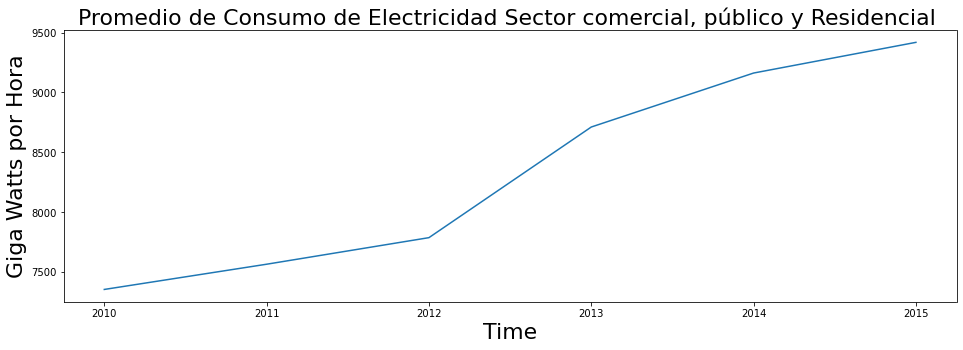

In [125]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,5))
ax.plot(data_statistics.date,data_statistics["Elect media"],label="Electricidad (Gwh)")
plt.xlabel("Time",fontsize="22")
plt.ylabel("Giga Watts por Hora",fontsize="22")
plt.title("Promedio de Consumo de Electricidad Sector comercial, público y Residencial ",fontsize="22")
plt.show()

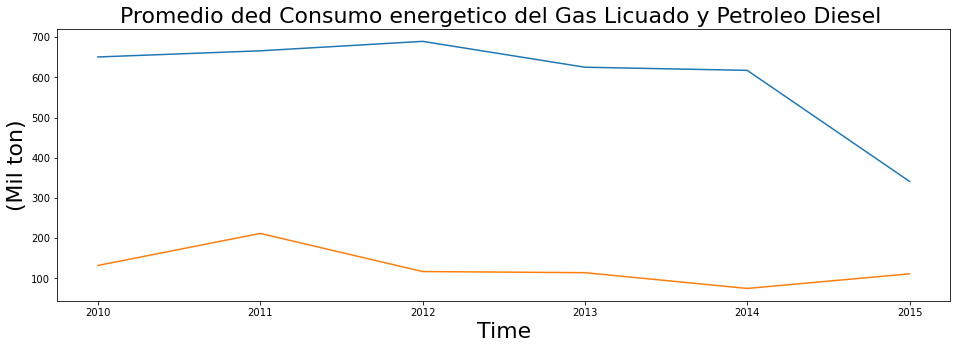

In [126]:
fig, ax = plt.subplots(figsize=(16,5))

ax.plot(data_statistics.date,data_statistics["gas licuado media"],label="gas licuado (Mil ton)")
ax.plot(data_statistics.date,data_statistics["petroleo Diesel media"],label="petroleo Diesel (Mil ton)")
plt.xlabel("Time",fontsize="22")
plt.ylabel("(Mil ton)",fontsize="22")
plt.title("Promedio ded Consumo energetico del Gas Licuado y Petroleo Diesel ",fontsize="22")
plt.show()

In [124]:
#df =  pd.concat(data,axis=1).reset_index(drop=True)
#df.to_csv("2010_2015_sector_transaporte.csv")
#df.head(10)